In [ ]:
# Importação de Bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [ ]:
# Carregamento e Visualização Inicial

df = pd.read_csv('Base_casas_regressao.csv')
print("Primeiras linhas do dataset:")
display(df.head())

print("Informações gerais:")
df.info()

print("Estatísticas descritivas:")
display(df.describe())


Primeiras linhas do dataset:


,Unnamed: 0,Area (m²),Quartos,Idade (anos),Distância Centro (km),Garagens,Banheiros,Andar,Vista_Mar,Mobilidade,Segurança,Area_Construida (m²),Total_Comodos,Zona,Preço (R$ mil),Area_Total (m²)
0,0,265.3,3.0,8,21.3,1,3,3.0,1,5.0,6,221.4,6,Afastada,700.4,486.7
1,1,115.9,4.0,0,5.9,2,4,6.0,0,10.0,10,106.0,8,Intermediária,858.6,221.9
2,2,62.5,2.0,28,8.6,1,2,18.0,0,4.0,8,53.8,4,Intermediária,628.4,116.3
3,3,60.7,4.0,14,0.7,1,4,1.0,0,4.0,10,55.1,8,Centro,934.1,115.8
4,4,102.4,2.0,13,3.4,1,2,NaN,0,5.0,8,83.0,4,Centro,904.5,185.4


Informações gerais:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             20000 non-null  int64  
 1   Area (m²)              19992 non-null  float64
 2   Quartos                19995 non-null  float64
 3   Idade (anos)           20000 non-null  int64  
 4   Distância Centro (km)  20000 non-null  float64
 5   Garagens               20000 non-null  int64  
 6   Banheiros              20000 non-null  int64  
 7   Andar                  12000 non-null  float64
 8   Vista_Mar              20000 non-null  int64  
 9   Mobilidade             19990 non-null  float64
 10  Segurança              20000 non-null  int64  
 11  Area_Construida (m²)   20000 non-null  float64
 12  Total_Comodos          20000 non-null  int64  
 13  Zona                   20000 non-null  object 
 14  Preço (R$ mil)         20000 non-n

,Unnamed: 0,Area (m²),Quartos,Idade (anos),Distância Centro (km),Garagens,Banheiros,Andar,Vista_Mar,Mobilidade,Segurança,Area_Construida (m²),Total_Comodos,Preço (R$ mil),Area_Total (m²)
count,20000.000000,19992.000000,19995.000000,20000.000000,20000.000000,20000.000000,20000.00000,12000.000000,20000.000000,19990.000000,20000.000000,20000.000000,20000.000000,20000.000000,19992.000000
mean,9999.500000,136.592412,3.242561,9.481100,6.032755,1.366900,2.80745,12.527250,0.200350,5.465733,8.412150,116.060515,6.049300,925.606290,252.656533
std,5773.647028,70.229086,1.177325,10.027336,4.248830,0.726368,0.97848,6.923746,0.400272,2.868523,1.370867,59.884278,2.083095,248.187406,130.004434
min,0.000000,0.000000,1.000000,0.000000,0.500000,0.000000,1.00000,1.000000,0.000000,1.000000,1.000000,12.500000,2.000000,80.000000,32.100000
25%,4999.750000,86.875000,2.000000,2.000000,2.900000,1.000000,2.00000,7.000000,0.000000,3.000000,8.000000,73.600000,4.000000,756.875000,160.475000
50%,9999.500000,121.900000,3.000000,6.000000,5.100000,1.000000,3.00000,12.000000,0.000000,5.000000,9.000000,103.600000,6.000000,920.800000,225.200000
75%,14999.250000,169.400000,4.000000,13.000000,8.100000,2.000000,4.00000,19.000000,0.000000,8.000000,9.000000,144.300000,8.000000,1092.400000,313.700000
max,19999.000000,1200.000000,6.000000,150.000000,35.000000,3.000000,7.00000,24.000000,1.000000,10.000000,10.000000,1022.200000,10.000000,1500.000000,2222.200000


In [ ]:
# Pré-processamento de Dados

for col in df.select_dtypes(include=np.number).columns:
    if df[col].isnull().sum() > 0:
        df[col].fillna(df[col].median(), inplace=True)

df = pd.get_dummies(df, columns=['Zona'], drop_first=True)

if 'Unnamed: 0' in df.columns:
    df = df.drop(columns=['Unnamed: 0'])

/tmp/ipython-input-1902511349.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)


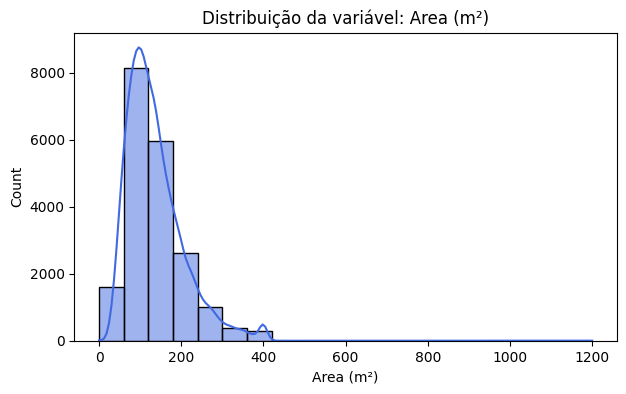

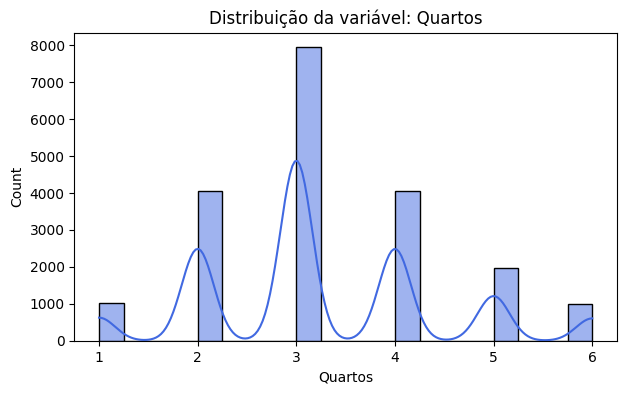

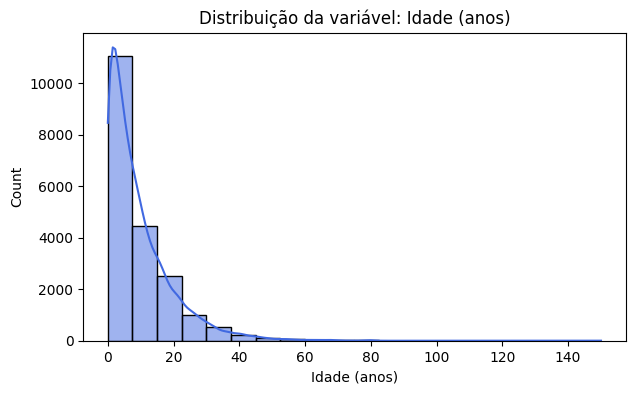

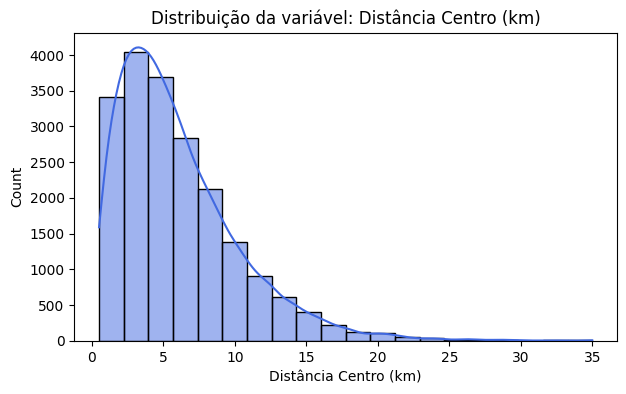

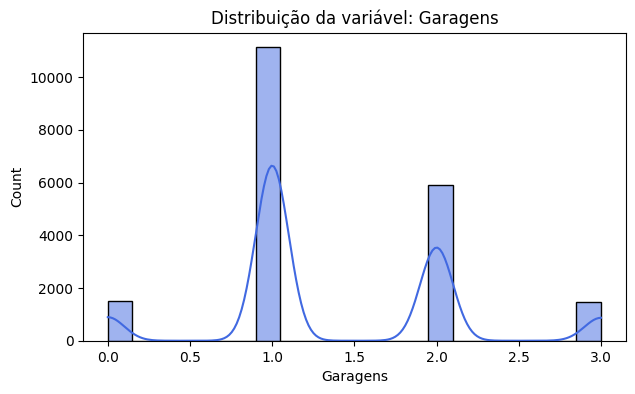

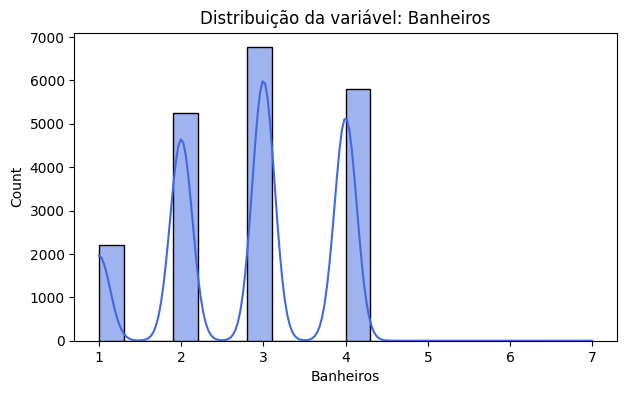

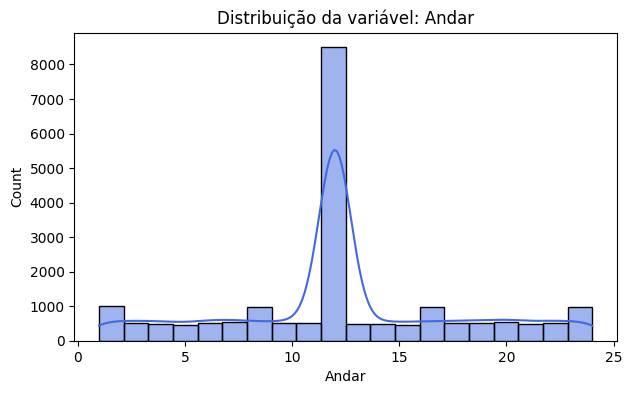

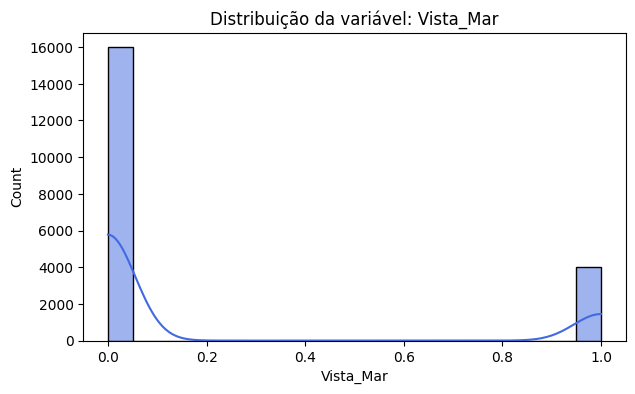

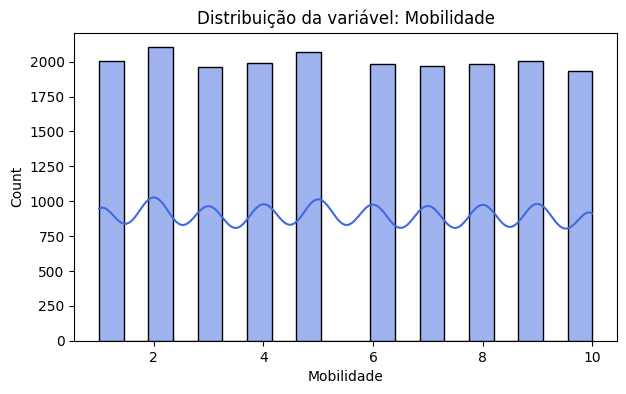

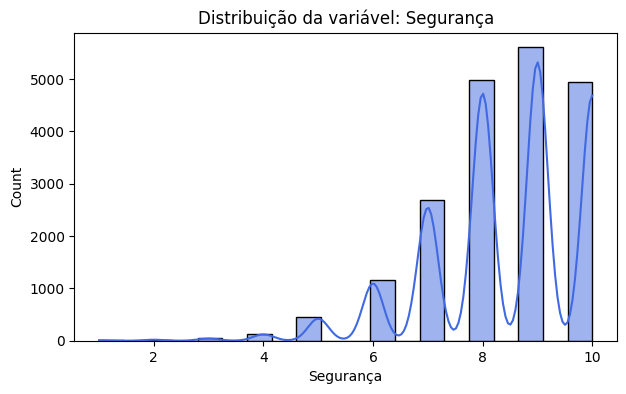

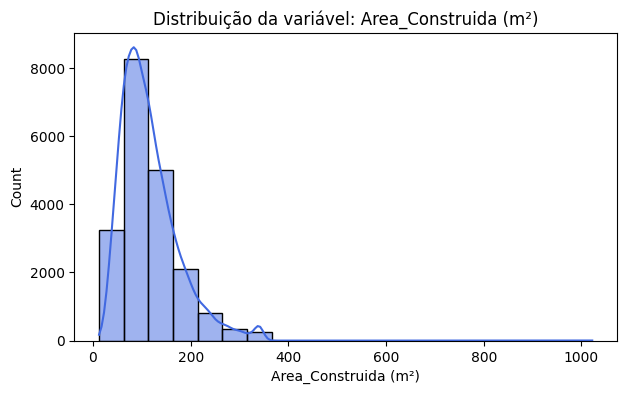

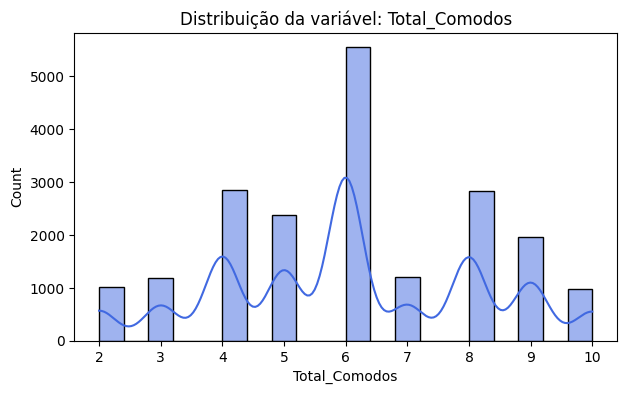

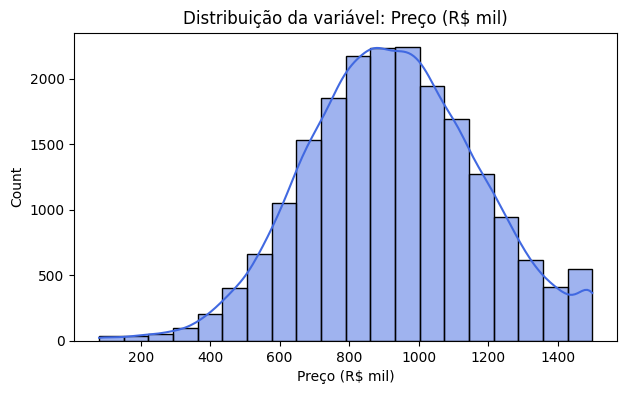

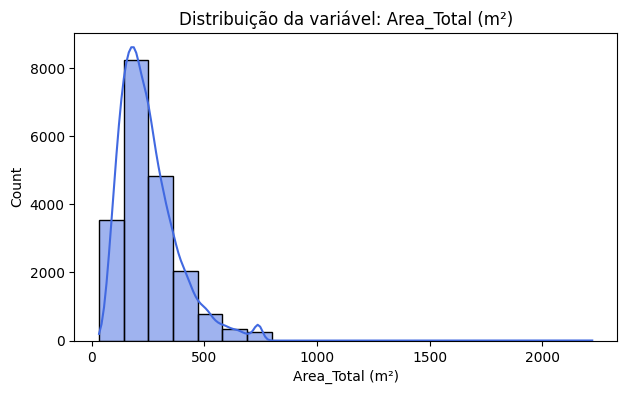

In [ ]:
#  Análise Exploratória e Distribuição
for coluna in df.select_dtypes(include=np.number).columns:
    plt.figure(figsize=(7,4))
    sns.histplot(df[coluna], kde=True, color='royalblue', bins=20)
    plt.title(f'Distribuição da variável: {coluna}')
    plt.show()

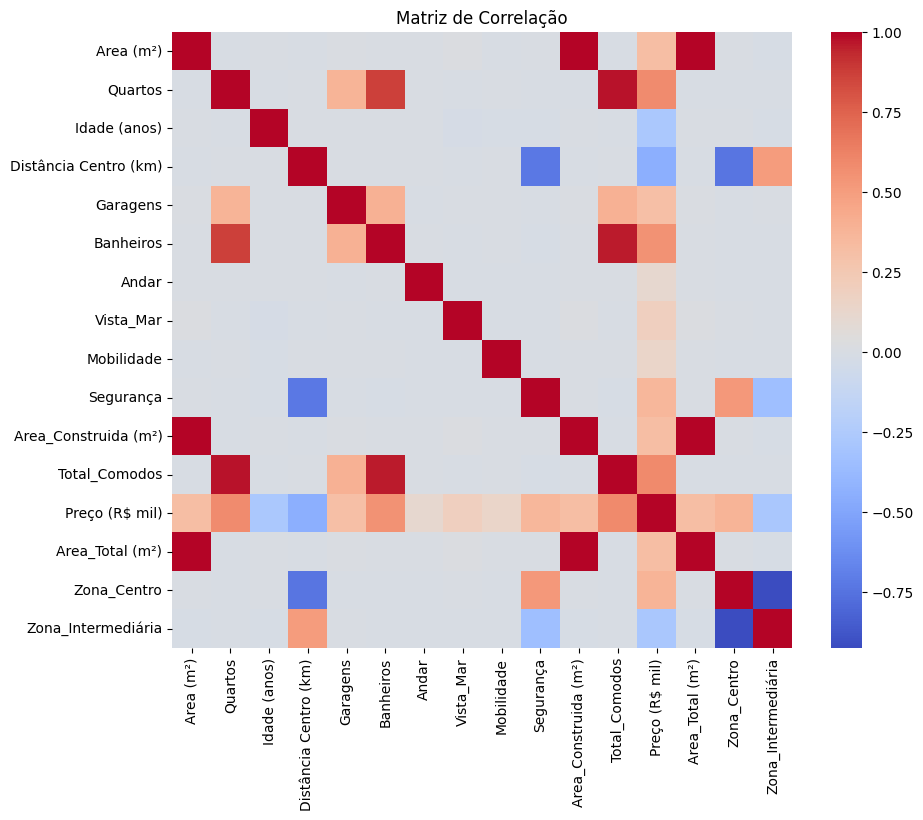

In [ ]:
#Correlação entre Variáveis
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=False, cmap='coolwarm')
plt.title('Matriz de Correlação')
plt.show()

In [ ]:
# Separação das Variáveis
coluna_alvo = 'Preço (R$ mil)'
X = df.drop(columns=[coluna_alvo])
y = df[coluna_alvo]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
#Treinamento e Predição do Modelo
modelo = LinearRegression()
modelo.fit(X_train, y_train)
y_pred = modelo.predict(X_test)

R²: 0.816
MAE: 84.15
RMSE: 105.98


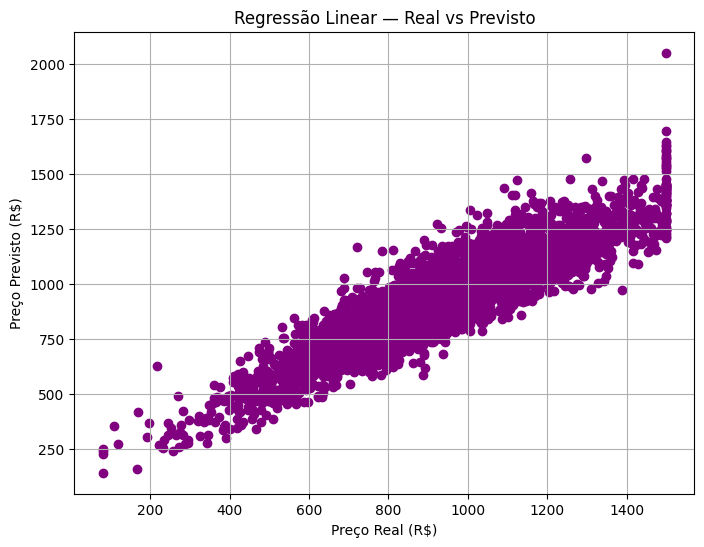

In [ ]:
#  Avaliação do Modelo

r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"R²: {r2:.3f}")
print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")

plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, color='purple')
plt.xlabel('Preço Real (R$)')
plt.ylabel('Preço Previsto (R$)')
plt.title('Regressão Linear — Real vs Previsto')
plt.grid(True)
plt.show()

In [ ]:
#Conclusão
#Com o desenvolvimento deste modelo de regressão linear, foi possível compreender na prática como variáveis quantitativas e categóricas influenciam diretamente o preço de um imóvel. A análise dos dados mostrou correlações coerentes com o contexto do mercado — como o aumento do preço conforme o tamanho e a localização da casa — enquanto o desempenho do modelo, com R² em torno de 0,81, indicou boa capacidade de explicação das variações nos preços. As métricas de erro (MAE e RMSE) demonstraram que o modelo apresenta previsões consistentes, embora ainda existam pequenas diferenças entre valores reais e previstos. Em síntese, o aprendizado obtido inclui tanto a interpretação estatística dos resultados quanto a compreensão de que a regressão linear, apesar de simples, é uma ferramenta eficaz para estimar tendências e apoiar decisões em análises de mercado imobiliário.